# Expedia Data Exploration & Visualization

## Business Understanding
Expedia has provided logs of customer behavior captured during their online search sessions. The purpose of this data is to take customer behavior and use it to predict which hotel clusters the customers are likely to book. Hotel clusters are based on Expedia's algorithm which groups hotels based on price, customer ratings, and location. A hotel cluster example might be hotels located in a downtown location in the $250-300 per night price range with an average rating between 3-4 stars (out of 5). However since the data is from Kaggle all the clusters are masked by an id.  We are unable to see the star rating or specific location of each hotel cluser.  Expedia has provided a training data set which is a random sample of customer behavior and hotel cluster bookings from 2013-2014. The objective is to use data mining techniques to develop a predictive algorithm based on these data and then apply it to a test data set consisting of randomly sampled customer behavior from 2015. Since this is part of a Kaggle competition, only Expedia knows the true outcome of how 2015 customers booked by hotel cluster. The success of the predictive algorithm will be based on the rate of accurate classification of 2015 Expedia customers into the appropriate hotel cluster. A successful submission will include 5 hotel cluster recommendations for each line item of the test data set. Scoring is based on whether the correct cluster is presented in the 5 clusters as well as where it is ranked in the 5 recommendation. The test data set has two less variables than the training data set which includes is booked since all the test data is actual bookings and the hotel cluster chosen.  

Based on some of the comments within the Kaggle site many people are only predicting about 25 percent of the hotel clusters.  With the anonymous hotel clusters this will be a difficult analysis.  

## Data Understanding

### Data Import and description:
Here's a basic rundown of the size of the data we'll be working with:

train_df.shape
(37,670,293, 24)

test_df.shape
(2,528,243, 22)

The training data set is huge at 4 GB and over 37 million rows. The test data set is 2.5 million rows and contains only bookings. We know out of the gate that we want to focus on the bookings in the training set to match the test set and to reduce the size of the data. There are also 100 hotel clusters that will be our classification targets but will be difficult to visualize in the preprocessing steps so only the top 5 booking clusters will be analyzed in lab 1. We will demonstrate how we arrive at the reduced data in the following coding steps.

The default data types and attribute descriptions as provided by Expedia are in the following table:

In [2]:
#Import required packages
import pandas as pd
import numpy as np
from datetime import date, datetime
import seaborn as sns
import matplotlib.pyplot as plt
import pylab as P
%matplotlib inline

In [2]:
# Read in attribute descriptions provided on the Kaggle competition data page.
expedia_data_df = pd.read_csv('data/Expedia_Data.csv')

pd.set_option('max_colwidth', 800)
expedia_data_df

,Column name,Data type,Description
0,date_time,datetime64[ns],Timestamp
1,site_name,int64,"ID of the Expedia point of sale (i.e. Expedia.com,�Expedia.co.uk,�Expedia.co.jp, ...)"
2,posa_continent,int64,ID of continent associated with site_name
3,user_location_country,int64,The ID of the country the customer is located
4,user_location_region,int64,The ID of the region the customer is located
5,user_location_city,int64,The ID of the city the customer is located
6,orig_destination_distance,float64,Physical distance between a hotel and a customer at the time of search.�A null means the distance could not be calculated
7,user_id,int64,ID of user
8,is_mobile,int64,"1 when a user connected from a mobile device, 0 otherwise"
9,is_package,int64,"1 if the click/booking was generated as a part of a package (i.e. combined with a flight), 0 otherwise"


### Describe the expedia data
We can begin to group some of the variables together based on which items have logical connections.  Site name will be highly correlated with posa continent and user location country.  The site name for Expedia includes expedia.com, expedia.co.uk, and expedia.co.jp however these are masked as ids again thanks to Kaggle. But since we know a certain id pertain to a certian country then the user location country should really match up fairly uniquely to certain site names (ids). There is the potential for anomalies in instances where a user is VPN'd to a server located outside their current search location, but the majority should match up. 

Other variables that will be highly correlated are the features that contain hotel and search destinations.  These items all help describe one of the primary hotel cluster components of geographic location. We expect to see patterns from these features.  

Hotel continent and user continent might allow us to figure out which they are rather than just using the ID.  There are 7 continents however only 6 have sizable populations.  Posa continent only has 5 so it means that expedia might not have been available in the 6th contient.  However there are 6 continents within the hotel continent variable so it means people are still able to book hotels in that continent even though the Expedia site might not be available there. We can also begin to use this methodology to understand the countries too.  

We might simply do a count by posa continent to figure out how many searches come from each.  By connecting this data with actual populations of the contintents we should be able to match up the corresponding population to the continent.  We can also do this to pick out the most populated countries.  The customers in the United States might act very differently than those in Japan.  

Other correlated variables might be the room count and the actual number of guests.  Especially when the guest count is over 2.  If there are children then the hotels chosen might differ from adult-only customers.  We do not know what each cluster is but there might be some that are very family friendly.  So customers who's search includes kids may only pick certain clusters.  

Finally another variable that might be benficial is the user id.  If a person has an account with Expedia and uses the site to book all their hotels they may have the same user id.  This user may only book a certain level of hotel so if we see a user ID repeated it may be much easier to figure out what that customer will pick each time.  Though this is probably only a really small subset it still will allow us to better predict the hotel cluster.  

### Verify Data Quality:

In [3]:
# Read in the full data set once. Setting the data types saves memory since all the continuous variables can be 
# held with int32 with the exception of 'orig_destination_distance' which will stay a float.

train_df = pd.read_csv('data/train.csv',
                    parse_dates=['date_time', 'srch_ci', 'srch_co'],
                    dtype={'site_name':np.int32, 'posa_continent':np.int32, 'user_location_country':np.int32,
                           'user_location_region':np.int32, 'user_location_city':np.int32, 'user_id':np.int32,
                           'is_mobile':bool, 'is_booking':bool, 'is_package':bool, 'channel':np.int32, 
                           'srch_adults_cnt':np.int32, 'srch_children_cnt':np.int32, 'srch_rm_cnt':np.int32,
                           'srch_destination_id':np.int32, 'srch_destination_type_id':np.object, 'cnt':np.int32,
                           'hotel_continent':np.int32, 'hotel_country':np.int32, 'hotel_market':np.int32, 
                           'hotel_cluster':np.int32})

In [5]:
# srch_ci and srch_co didn't convert to datetime
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37670293 entries, 0 to 37670292
Data columns (total 24 columns):
date_time                    datetime64[ns]
site_name                    int32
posa_continent               int32
user_location_country        int32
user_location_region         int32
user_location_city           int32
orig_destination_distance    float64
user_id                      int32
is_mobile                    bool
is_package                   bool
channel                      int32
srch_ci                      object
srch_co                      object
srch_adults_cnt              int32
srch_children_cnt            int32
srch_rm_cnt                  int32
srch_destination_id          int32
srch_destination_type_id     object
is_booking                   bool
cnt                          int32
hotel_continent              int32
hotel_country                int32
hotel_market                 int32
hotel_cluster                int32
dtypes: bool(3), datetime64[ns](1)

### Sampling the data
In order for us to process the data in a timely matter we will need to take a sample of the entire set. Our first big cut will only include customers who actually booked. This keeps the training set consistent with the test set (which only contains bookings), and reduces the sample size from 37 million down to 3 million.

In [6]:
#Exclude all clicks to retain only bookings since the test dataset only contains bookings.
train_booked_df = train_df[train_df['is_booking'] != False]

In [7]:
# Export to CSV file:
train_booked_df.to_csv('train_booked.csv')

In [8]:
# From this point it's more efficient to reference the reduced data set.
train_booked_df = pd.read_csv('data/train_booked.csv', parse_dates=['date_time', 'srch_ci', 'srch_co'])
train_booked_df.drop(['Unnamed: 0'], axis=1, inplace=True)

# Adding variables:
Checkin (srch_ci) and checkout (srch_co) don't necessarily mean a lot to us in a vacuum, but calculating checkin relative to date of search yields the user's booking window, and checkout relative to checkin yields length of stay. We expect these continuous variables could potentially lend explanatory power to this analysis. We also want to analyze weeks as a potential indicator of seasonality. We will be adding three varibles based on the check in, check out, and search dates.  

### Booking window 
- Will be calculated by subtracting the the the search date from the check in date.  We will be able to see how far in advance the guest books the hotel and wheter certain clusters match up with certain booking windows.  Since the clusters are based on the price there is a chance that the price might be lower the further out they book the hotel which may point us to certain clusters.  

### Length of stay 
- Will be calculated by subtracting the check in date from the check out date allowing us to see how long the actual trip is.  We might be able to see if the hotel stay is for business or leisure.  Customers who only go for one night may choose a very different cluster than those who book for an entire week.

### Check In week
- Will use the week function in order for us to see which week in the year the trip was booked.  We can see if there is seasonality to when customers book certain trips.  We can start to deduce if it a summer trip with the family or a romantic getaway for just a couple.  By beginning to predict these items about the customer we will begin to see patterns that might also predict which hotel cluster they choose.  

### Search week 
- Will also use the week function but this time on the search date.  This variable will also give us additional hints on to when customers search for hotels.  

### Family size
- Will add adults and children to get the full guest count of the hotel search as a potential feature that helps cluster classification.

### Variables we wish we had
If we had the ability to add any variable, being able to break out the clusters into the descriptive components would be the most helpful.  However, it would not be a very difficult problem on Kaggle if we had that data available.  By combining varibles and assessing patterns we can eventually create predictions of who the user might be.  It will not be perfect but any pattern is helpful down the line toward ultimately solving the Kaggle problem.  


In [9]:
# there are 2 datetime fields that didn't convert using parse_dates
ci_ord    = pd.to_datetime(train_booked_df.loc[:,'srch_ci'], format='%Y-%m-%d').apply(lambda x: x.toordinal() if x == x else np.nan)
co_ord    = pd.to_datetime(train_booked_df.loc[:,'srch_co'], format='%Y-%m-%d').apply(lambda x: x.toordinal() if x == x else np.nan)
srch_ord  = train_booked_df.loc[:,'date_time'].apply(lambda x: x.toordinal() if x == x else np.nan)

# Length of stay and booking window are hopefully variables that could lend predictive value.
train_booked_df['length_of_stay'] = abs(co_ord - ci_ord)
train_booked_df['booking_window'] = abs(ci_ord - srch_ord)

# Week provides a level of granularity that might pick up seasonal and holiday pattern specific to each continent and country of origin
train_booked_df['ci_week']   = pd.to_datetime(train_booked_df.loc[:,'srch_ci'], format='%Y-%m-%d').apply(lambda x: x.week if x == x else np.nan)
train_booked_df['srch_week']   = train_booked_df['date_time'].apply(lambda x: x.week if x == x else np.nan)

train_booked_df['family_size'] = train_booked_df.srch_adults_cnt + train_booked_df.srch_children_cnt

train_booked_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000693 entries, 0 to 3000692
Data columns (total 29 columns):
date_time                    datetime64[ns]
site_name                    int64
posa_continent               int64
user_location_country        int64
user_location_region         int64
user_location_city           int64
orig_destination_distance    float64
user_id                      int64
is_mobile                    int64
is_package                   int64
channel                      int64
srch_ci                      datetime64[ns]
srch_co                      datetime64[ns]
srch_adults_cnt              int64
srch_children_cnt            int64
srch_rm_cnt                  int64
srch_destination_id          int64
srch_destination_type_id     int64
is_booking                   int64
cnt                          int64
hotel_continent              int64
hotel_country                int64
hotel_market                 int64
hotel_cluster                int64
length_of_stay    

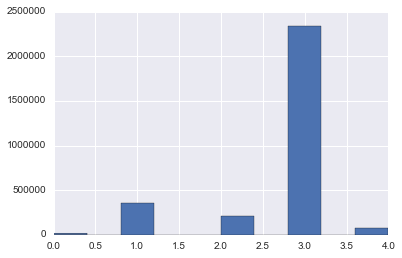

In [11]:
### looking at ways to group the orig_destination_distance
##bins=20, range=(0,26), alpha = .5
train_booked_df['posa_continent'].dropna().hist()
P.show()

There are 6 continents that a customer can book in but only 5 from which they search.  So there is a continent that does not have the Expedia site.  Based on the examples given in the site name we know that expedia exists in North America, Europe and Asia.  Since expedia originated in the US it is very easy to have moved to Australia since it is also an English speaking continent.  South America is so close to North America so it is highly likely that the Expedia site also exists within South America.  This only leaves Africa and Antarica as locations that people do not book from however they can find a hotel in Africa on Expedia.  

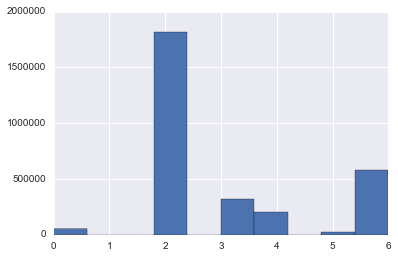

In [12]:
train_booked_df['hotel_continent'].dropna().hist()
P.show()

There are too many countries to really visualize this well but we can assume that since Expedia started in the US it will most likely be the country with the most searches.  

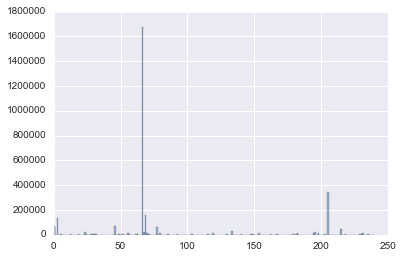

In [13]:
train_booked_df['user_location_country'].dropna().hist(bins=200, alpha = .5)
P.show()

Only 10 percent of the bookings happen on a mobile device.  We can also predict that the people who are booking on a mobile device are a younger generation that are more tech savvy.  When doing analysis on the full data set being able to break the customers into categories will help us in our final prediction.  

0    90.078725
1     9.921275
Name: is_mobile, dtype: float64


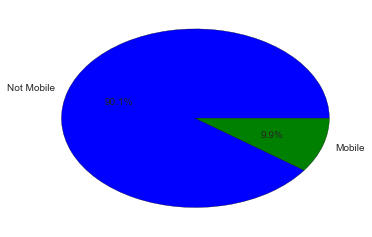

In [16]:
mobile = train_booked_df['is_mobile'].value_counts()/train_booked_df['is_mobile'].count()*100
print(mobile)
labels = 'Not Mobile','Mobile'
P.pie(mobile,labels = labels, autopct='%1.1f%%')
P.show()

Only 13.7% choose a package including airfare, car, etc. while the others only use Expedia for the hotel.  People who book packages may be those looking for a deal or those who don't travel much.  Again these items allow us to create buckets of customer type. 

0    86.330224
1    13.669776
Name: is_package, dtype: float64


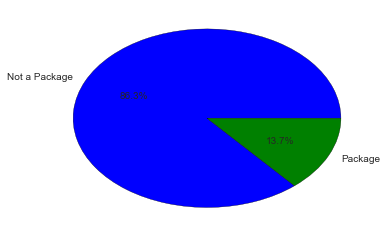

In [17]:
package = train_booked_df['is_package'].value_counts()/train_booked_df['is_package'].count()*100
print(package)
labels = 'Not a Package','Package'
P.pie(package, labels=labels, autopct='%1.1f%%')

#train_booked_df['is_package'].dropna().hist()
P.show()

### Further reduction of data size
We know that the classification task from Kaggle requires the prediction of 100 hotel clusters based on the features provided. For our first attempt at classification and visualizing data in Python, we have decided to take a subset of the most common hotel clusters to analyze for the remainder of this semester's analyses. It was also computationally expensive to work with 3 million samples in our attempts at imputations so there are practical reasons for this further reduction other than just level of experience.

We start by visualizing the most commonly occuring hotel clusters in the training data set:

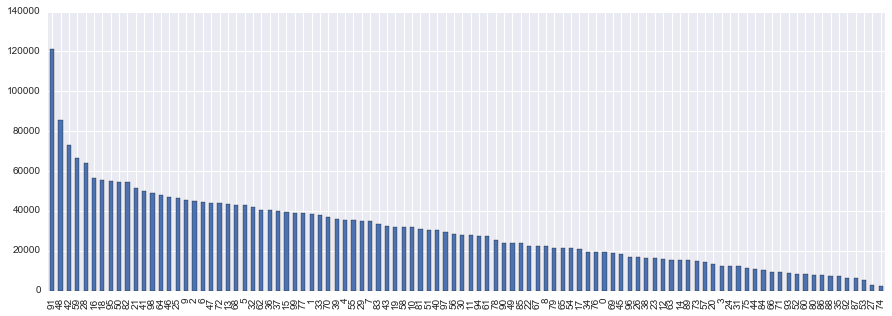

In [18]:
# Plot frequency for each hotel_clusters

train_booked_df["hotel_cluster"].value_counts().plot(kind='bar',figsize=(15,5))

In [19]:
train_booked_df["hotel_cluster"].value_counts().nlargest(10)

91    120972
48     85377
42     73123
59     66609
28     63978
16     56676
18     55659
95     55125
50     54409
82     54320
Name: hotel_cluster, dtype: int64

The histogram shows that clusters 91, 48, 42, 59, and 28 round out the top 5 with 91 well ahead of the pack. There is a small break between the top 5 and top 10 clusters so we will proceed with visualizations for the top 5 clusters as the focal point.

Our new dataframe is now the top 5 hotel clusters and remains only bookings. This leaves us with 410,059 samples, a far more manageable dataset.

In [20]:
# List holds top hotel_clusters:
top5 = [91, 48, 42, 59, 28]

# Create new dataframes containing top5 and top10 clusters.
train_top5_df = train_booked_df[train_booked_df['hotel_cluster'].isin(top5)]

print train_top5_df.shape

(410059, 29)


In [45]:
# Export the top5 dataframe to a CSV file in the current directory:
train_top5_df.to_csv('train_booked_top5.csv')

### From this point on we'll be using reduced data extract exported to csv

In [3]:
# From this point it's more efficient to reference the reduced data set.
# The reduced data set can be downloaded here: https://www.dropbox.com/s/xqjbug5fhpme0so/train_booked_top5.csv?dl=0
train_booked_df = pd.read_csv('data/train_booked_top5.csv', parse_dates=['date_time', 'srch_ci', 'srch_co'])
train_booked_df.drop(['Unnamed: 0'], axis=1, inplace=True)

### Re-compute new features:

In [5]:
# there are 2 datetime fields that didn't convert using parse_dates
ci_ord    = pd.to_datetime(train_booked_df.loc[:,'srch_ci'], format='%Y-%m-%d').apply(lambda x: x.toordinal() if x == x else np.nan)
co_ord    = pd.to_datetime(train_booked_df.loc[:,'srch_co'], format='%Y-%m-%d').apply(lambda x: x.toordinal() if x == x else np.nan)
srch_ord  = train_booked_df.loc[:,'date_time'].apply(lambda x: x.toordinal() if x == x else np.nan)

# Length of stay and booking window are hopefully variables that could lend predictive value.
train_booked_df['length_of_stay'] = abs(co_ord - ci_ord)
train_booked_df['booking_window'] = abs(ci_ord - srch_ord)

# Week provides a level of granularity that might pick up seasonal and holiday pattern specific to each continent and country of origin
train_booked_df['ci_week']   = pd.to_datetime(train_booked_df.loc[:,'srch_ci'], format='%Y-%m-%d').apply(lambda x: x.week if x == x else np.nan)
train_booked_df['srch_week']   = train_booked_df['date_time'].apply(lambda x: x.week if x == x else np.nan)

train_booked_df['family_size'] = train_booked_df.srch_adults_cnt + train_booked_df.srch_children_cnt

### Imputation of null values
We've arrived at a reduced data set, but we still know through earlier data exploration that the orig_destination_distance variable is missing about 1/4 of its values. We will create a temporary dataframe to isolate the features we want to use to impute an average distance from user to hotel destination. To accomplish this we will be using posa_continent to get an average continent location, and hotel continent and country to do the same on the hotel destination side. We understand that these will be calculating averages with potentially huge variances, but it is the best we can do with the features provided.

In [6]:
# Sum of NaN values shows distance missing 24% of values.
train_booked_df.isnull().sum()

date_time                        0
site_name                        0
posa_continent                   0
user_location_country            0
user_location_region             0
user_location_city               0
orig_destination_distance    96910
user_id                          0
is_mobile                        0
is_package                       0
channel                          0
srch_ci                          0
srch_co                          0
srch_adults_cnt                  0
srch_children_cnt                0
srch_rm_cnt                      0
srch_destination_id              0
srch_destination_type_id         0
is_booking                       0
cnt                              0
hotel_continent                  0
hotel_country                    0
hotel_market                     0
hotel_cluster                    0
length_of_stay                   0
booking_window                   0
ci_week                          0
srch_week                        0
family_size         

In [7]:
# Imputation accomplished through smaller dataframe:

train_df_imputed = train_booked_df[['orig_destination_distance', 'posa_continent', 'hotel_continent', 'hotel_country']]

train_df_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 410059 entries, 0 to 410058
Data columns (total 4 columns):
orig_destination_distance    313149 non-null float64
posa_continent               410059 non-null int64
hotel_continent              410059 non-null int64
hotel_country                410059 non-null int64
dtypes: float64(1), int64(3)
memory usage: 12.5 MB


In [8]:
# Impute the median distance between a user location and destination
train_df_imputed = train_booked_df[['orig_destination_distance', 'posa_continent', 'hotel_continent', 'hotel_country']]
train_df_imputed['orig_destination_distance_imputed'] = train_df_imputed.groupby(['posa_continent',
                                                                                  'hotel_continent',
                                                                                  'hotel_country']).transform(lambda x: x.fillna(x.mean()))
# Change back to float
train_df_imputed['orig_destination_distance_imputed'] = train_df_imputed['orig_destination_distance_imputed'].astype(np.float64)

/Users/danielmurphy/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/danielmurphy/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


### Imputation success
We can see from the sum of the NaN values that these features' mean distances successfully imputed all but 397 sample values. We will drop these since the number of instances is small.

In [9]:
# Shows new imputed field missing just a handful (relatively) of values
train_df_imputed.isnull().sum()

orig_destination_distance            96910
posa_continent                           0
hotel_continent                          0
hotel_country                            0
orig_destination_distance_imputed      397
dtype: int64

Imputation values are in the range we would expect to see:

In [10]:
train_df_imputed.head(20)

,orig_destination_distance,posa_continent,hotel_continent,hotel_country,orig_destination_distance_imputed
0,3.3379,3,2,50,3.337900
1,2586.0222,3,2,50,2586.022200
2,2586.0222,3,2,50,2586.022200
3,5761.2438,1,2,50,5761.243800
4,NaN,2,2,50,1123.163858
5,8320.7631,3,3,48,8320.763100
6,400.0866,3,2,50,400.086600
7,NaN,3,2,50,696.910654
8,1198.5694,3,2,50,1198.569400
9,2303.0351,3,2,50,2303.035100


In [11]:
# Overwrite distances with imputed values:
train_booked_df['orig_destination_distance'] = train_df_imputed['orig_destination_distance_imputed']

In [12]:
# Drop the rows where the orig_destination_distance variables contains NaN:
train_booked_df = train_booked_df.dropna()

In [13]:
# Confirm no NaN values present:
train_booked_df.isnull().sum()

date_time                    0
site_name                    0
posa_continent               0
user_location_country        0
user_location_region         0
user_location_city           0
orig_destination_distance    0
user_id                      0
is_mobile                    0
is_package                   0
channel                      0
srch_ci                      0
srch_co                      0
srch_adults_cnt              0
srch_children_cnt            0
srch_rm_cnt                  0
srch_destination_id          0
srch_destination_type_id     0
is_booking                   0
cnt                          0
hotel_continent              0
hotel_country                0
hotel_market                 0
hotel_cluster                0
length_of_stay               0
booking_window               0
ci_week                      0
srch_week                    0
family_size                  0
dtype: int64

In [17]:
# Export the top5 dataframe to a CSV file in the current directory:
train_booked_df.to_csv('train_booked_top5_imputed.csv')

## Simple descriptive statistics:

### Variable groupings

We know that the majority of our variables are categorical or boolean but stored numerically. Before we describe and visualize our statistics we'll group them by variable types:

In [15]:
#Changing our data types saves roughly 15 MB in memory.

# let's start by first changing the numeric values to be int32 (orig_destination_distance stays float64)
continuous_features = ['srch_adults_cnt', 'srch_children_cnt', 'family_size', 'srch_rm_cnt', 'cnt', 'length_of_stay', 
                      'booking_window']

# ints that store [0,1] switched to booleans
boolean_features = ['is_mobile', 'is_package', 'is_booking']

# and the ordinnal values to be integers
ordinal_features = ['ci_week', 'srch_week']

# categorical variables stored as objects
categ_features = ['site_name','posa_continent','user_location_country', 'user_location_region',
                 'user_location_city', 'user_id', 'channel', 'srch_destination_id', 'srch_destination_type_id',
                 'hotel_continent', 'hotel_country', 'hotel_market', 'hotel_cluster'];

# use the "astype" function to change the variable type
train_booked_df[continuous_features] = train_booked_df[continuous_features].astype(np.int32)
train_booked_df[boolean_features] = train_booked_df[boolean_features].astype(np.bool)
train_booked_df[ordinal_features] = train_booked_df[ordinal_features].astype(np.int32)
train_booked_df[categ_features] = train_booked_df[categ_features].astype(np.object)

# Clean up the date variables that we no longer need since we've converted to more normalized continuous or ordinals.
train_booked_df.drop(['date_time', 'srch_ci', 'srch_co'], axis=1, inplace=True)

continuous_features = continuous_features + ['orig_destination_distance']

### Summary Statistics Overview:

In [16]:
# Simple descriptive statistics.
train_booked_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
orig_destination_distance,409662.0,1227.499574,1704.069686,0.0056,224.006125,696.910654,1302.63405,11940.8823
srch_adults_cnt,409662.0,1.846818,0.918733,0.0000,1.000000,2.000000,2.00000,9.0000
srch_children_cnt,409662.0,0.329079,0.732172,0.0000,0.000000,0.000000,0.00000,9.0000
srch_rm_cnt,409662.0,1.132409,0.493389,0.0000,1.000000,1.000000,1.00000,8.0000
cnt,409662.0,1.012945,0.130946,1.0000,1.000000,1.000000,1.00000,10.0000
length_of_stay,409662.0,1.939560,1.603017,1.0000,1.000000,1.000000,2.00000,28.0000
booking_window,409662.0,27.528970,45.699842,0.0000,3.000000,10.000000,31.00000,496.0000
ci_week,409662.0,28.795236,14.594714,1.0000,17.000000,30.000000,41.00000,53.0000
srch_week,409662.0,28.553598,14.464222,1.0000,17.000000,30.000000,41.00000,52.0000
family_size,409662.0,2.175896,1.260563,0.0000,1.000000,2.000000,3.00000,18.0000


We can see that the average distance between user and hotel destination is 1,200 miles (assumed to be in miles but not stated) with a max of 12,000 miles. These distances make sense given that the max is roughly equal to the exact opposite side of the globe, and given continent sizes 1,200 is a reasonable mean distance. Most people stay 2 nights, book about a month out, and book one room for two people who are usually adults. Most transactions on the site also occur in one session but can take as many as 10 for the same user. These summary statistics start to paint a picture of what the average Expedia customer looks like. Let's delve a bit deeper and see whether the continuous features' summary stats vary by our 5 different hotel clusters.

### Summary Statistics by classes:

In [66]:
train_booked_df.groupby(['hotel_cluster'])['orig_destination_distance','length_of_stay','booking_window','cnt',
                                          'srch_rm_cnt','family_size'].agg(['mean','median','count','min','max']).transpose()


hotel_cluster                               28            42            48  \
orig_destination_distance mean     1356.560820    977.806108    947.031169   
                          median    696.910654    636.529050    604.610000   
                          count   63922.000000  73088.000000  85350.000000   
                          min         0.005600      0.005600      0.005600   
                          max     11643.272600  11683.773000  11631.583300   
length_of_stay            mean        1.893589      1.865121      1.968869   
                          median      1.000000      1.000000      1.000000   
                          count   63922.000000  73088.000000  85350.000000   
                          min         1.000000      1.000000      1.000000   
                          max        28.000000     28.000000     28.000000   
booking_window            mean       32.449829     26.046246     24.091166   
                          median     13.000000      9.000000      7.000000   
                          count   63922.000000  73088.000000  85350.000000   
                          min         0.000000      0.000000      0.000000   
                          max       491.000000    496.000000    465.000000   
cnt                       mean        1.013735      1.012273      1.012689   
                          median      1.000000      1.000000      1.000000   
                          count   63922.000000  73088.000000  85350.000000   
                          min         1.000000      1.000000      1.000000   
                          max         6.000000      6.000000      8.000000   
srch_rm_cnt               mean        1.129173      1.128735      1.139649   
                          median      1.000000      1.000000      1.000000   
                          count   63922.000000  73088.000000  85350.000000   
                          min         0.000000      0.000000      0.000000   
                          max         8.000000      8.000000      8.000000   
family_size               mean        2.268796      2.219927      2.119906   
                          median      2.000000      2.000000      2.000000   
                          count   63922.000000  73088.000000  85350.000000   
                          min         0.000000      0.000000      0.000000   
                          max        18.000000     16.000000     18.000000   

hotel_cluster                               59             91  
orig_destination_distance mean     2432.954841     846.948813  
                          median   1140.940517     597.063139  
                          count   66340.000000  120962.000000  
                          min         0.005600       0.005600  
                          max     11940.882300   11633.714600  
length_of_stay            mean        2.027796       1.939758  
                          median      1.000000       1.000000  
                          count   66340.000000  120962.000000  
                          min         1.000000       1.000000  
                          max        28.000000      28.000000  
booking_window            mean       33.543217      24.951712  
                          median     15.000000       9.000000  
                          count   66340.000000  120962.000000  
                          min         0.000000       0.000000  
                          max       495.000000     477.000000  
cnt                       mean        1.013943       1.012566  
                          median      1.000000       1.000000  
                          count   66340.000000  120962.000000  
                          min         1.000000       1.000000  
                          max        10.000000       8.000000  
srch_rm_cnt               mean        1.141875       1.126040  
                          median      1.000000       1.000000  
                          count   66340.000000  120962.000000  
                          min         0.00000

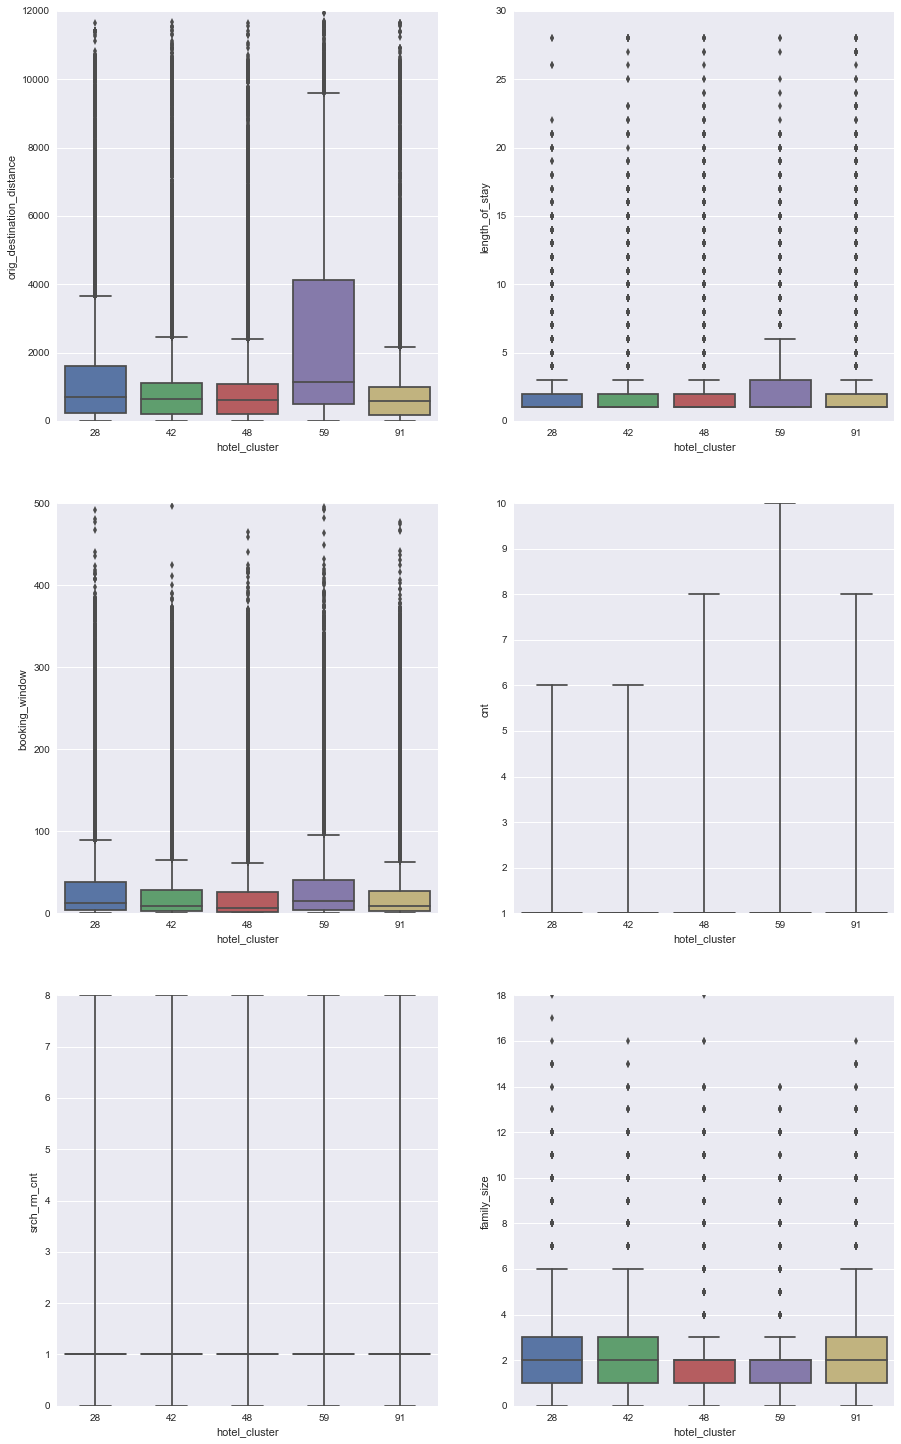

In [39]:
# These boxplots help us visualize differences in the medians and overal distributions of our 5 classes:
fig, ((axis1,axis2),(axis3,axis4),(axis5,axis6)) = plt.subplots(3,2,figsize=(15,25))

sns.boxplot(x='hotel_cluster', y='orig_destination_distance', data=train_booked_df, ax=axis1)
sns.boxplot(x='hotel_cluster', y='length_of_stay', data=train_booked_df, ax=axis2)
sns.boxplot(x='hotel_cluster', y='booking_window', data=train_booked_df, ax=axis3)
sns.boxplot(x='hotel_cluster', y='cnt', data=train_booked_df, ax=axis4)
sns.boxplot(x='hotel_cluster', y='srch_rm_cnt', data=train_booked_df, ax=axis5)
sns.boxplot(x='hotel_cluster', y='family_size', data=train_booked_df, ax=axis6)

(-300, 3000)

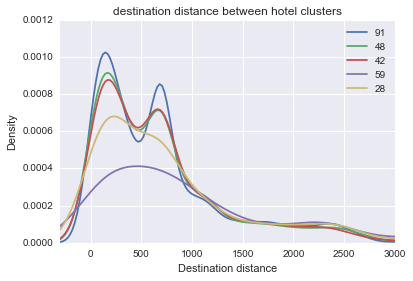

In [87]:
# plots a kernel density estimate of the classes by distance
train_booked_df.orig_destination_distance[train_booked_df.hotel_cluster == 91].plot(kind='kde')    
train_booked_df.orig_destination_distance[train_booked_df.hotel_cluster == 48].plot(kind='kde')
train_booked_df.orig_destination_distance[train_booked_df.hotel_cluster == 42].plot(kind='kde')
train_booked_df.orig_destination_distance[train_booked_df.hotel_cluster == 59].plot(kind='kde')
train_booked_df.orig_destination_distance[train_booked_df.hotel_cluster == 28].plot(kind='kde')
 # plots an axis lable
plt.xlabel("Destination distance")    
plt.title("destination distance between hotel clusters")
# sets our legend for our graph.
plt.legend(('91', '48','42','59','28'),loc='best') 
plt.xlim(-300,3000)

### Summary statistics by class insights:
Hotel clusters 28 and especially 59 stand out as having higher median distances between user location and hotel destination with wider inter quartile ranges. Both of these clusters also see users search earlier for these clusters evidenced by the slightly larger median booking window (IQR is also wider here). The KDE plot also shows this in another way, where we can see that clusters 91, 48, and 42 all have density peaks at smaller distances. 

Cluster 59 stands out in others features as well, with longer length of stay, and the number of search event maximum the highest at 10. When it comes to the size of the guest party all clusters center around the family size of median 2, but clusters 48 and 59 have much narrower IQRs as well as short tails which tells us that these clusters are less likely to contain any more than 2 guests while the other three see their IQRs extend to 3 guests with much higher max family size. 

### Outliers:
We can generally see outliers beyond the whiskers of many of these boxplots, but with medians so low that hover over zero none of these values jump out as problematic or potentially erroneous.

### Conclusions based on these plots:
Cluster 59 is the most distant location from most travelers and because of this distance they stay longer, book further in advance, and might contemplate the purchase more thoroughly by visiting Expedia more often, logging more site counts in the process. We know that the median site count is still 1 instance, the same as the other classes, but since the max value is the highest for this class we are drawing this conclusion. This destination also appears to be less children friendly based on what we already know about family size averages and the prevalence of more adult booked trips.

Cluster 28 is slightly more distant from the overall median which also effects booking window, but not enough so to lengthen the guest stay. This might also be a more family friendly destination since family size IQR and max values are the most widely distributed of all clusters.

Cluster 48 has the shortest median booking window, average length of stay, and is less family friendly. Perhaps this is a location and hotel type frequented by business travelers.

Clusters 42 and 91 don't really stand out in these boxplots as significantly different from the summary statistics means. 

Let's add in our boolean features to see if we can scratch a little deeper at clusters 42 and 91 and further support what we see with the other classes more clearly

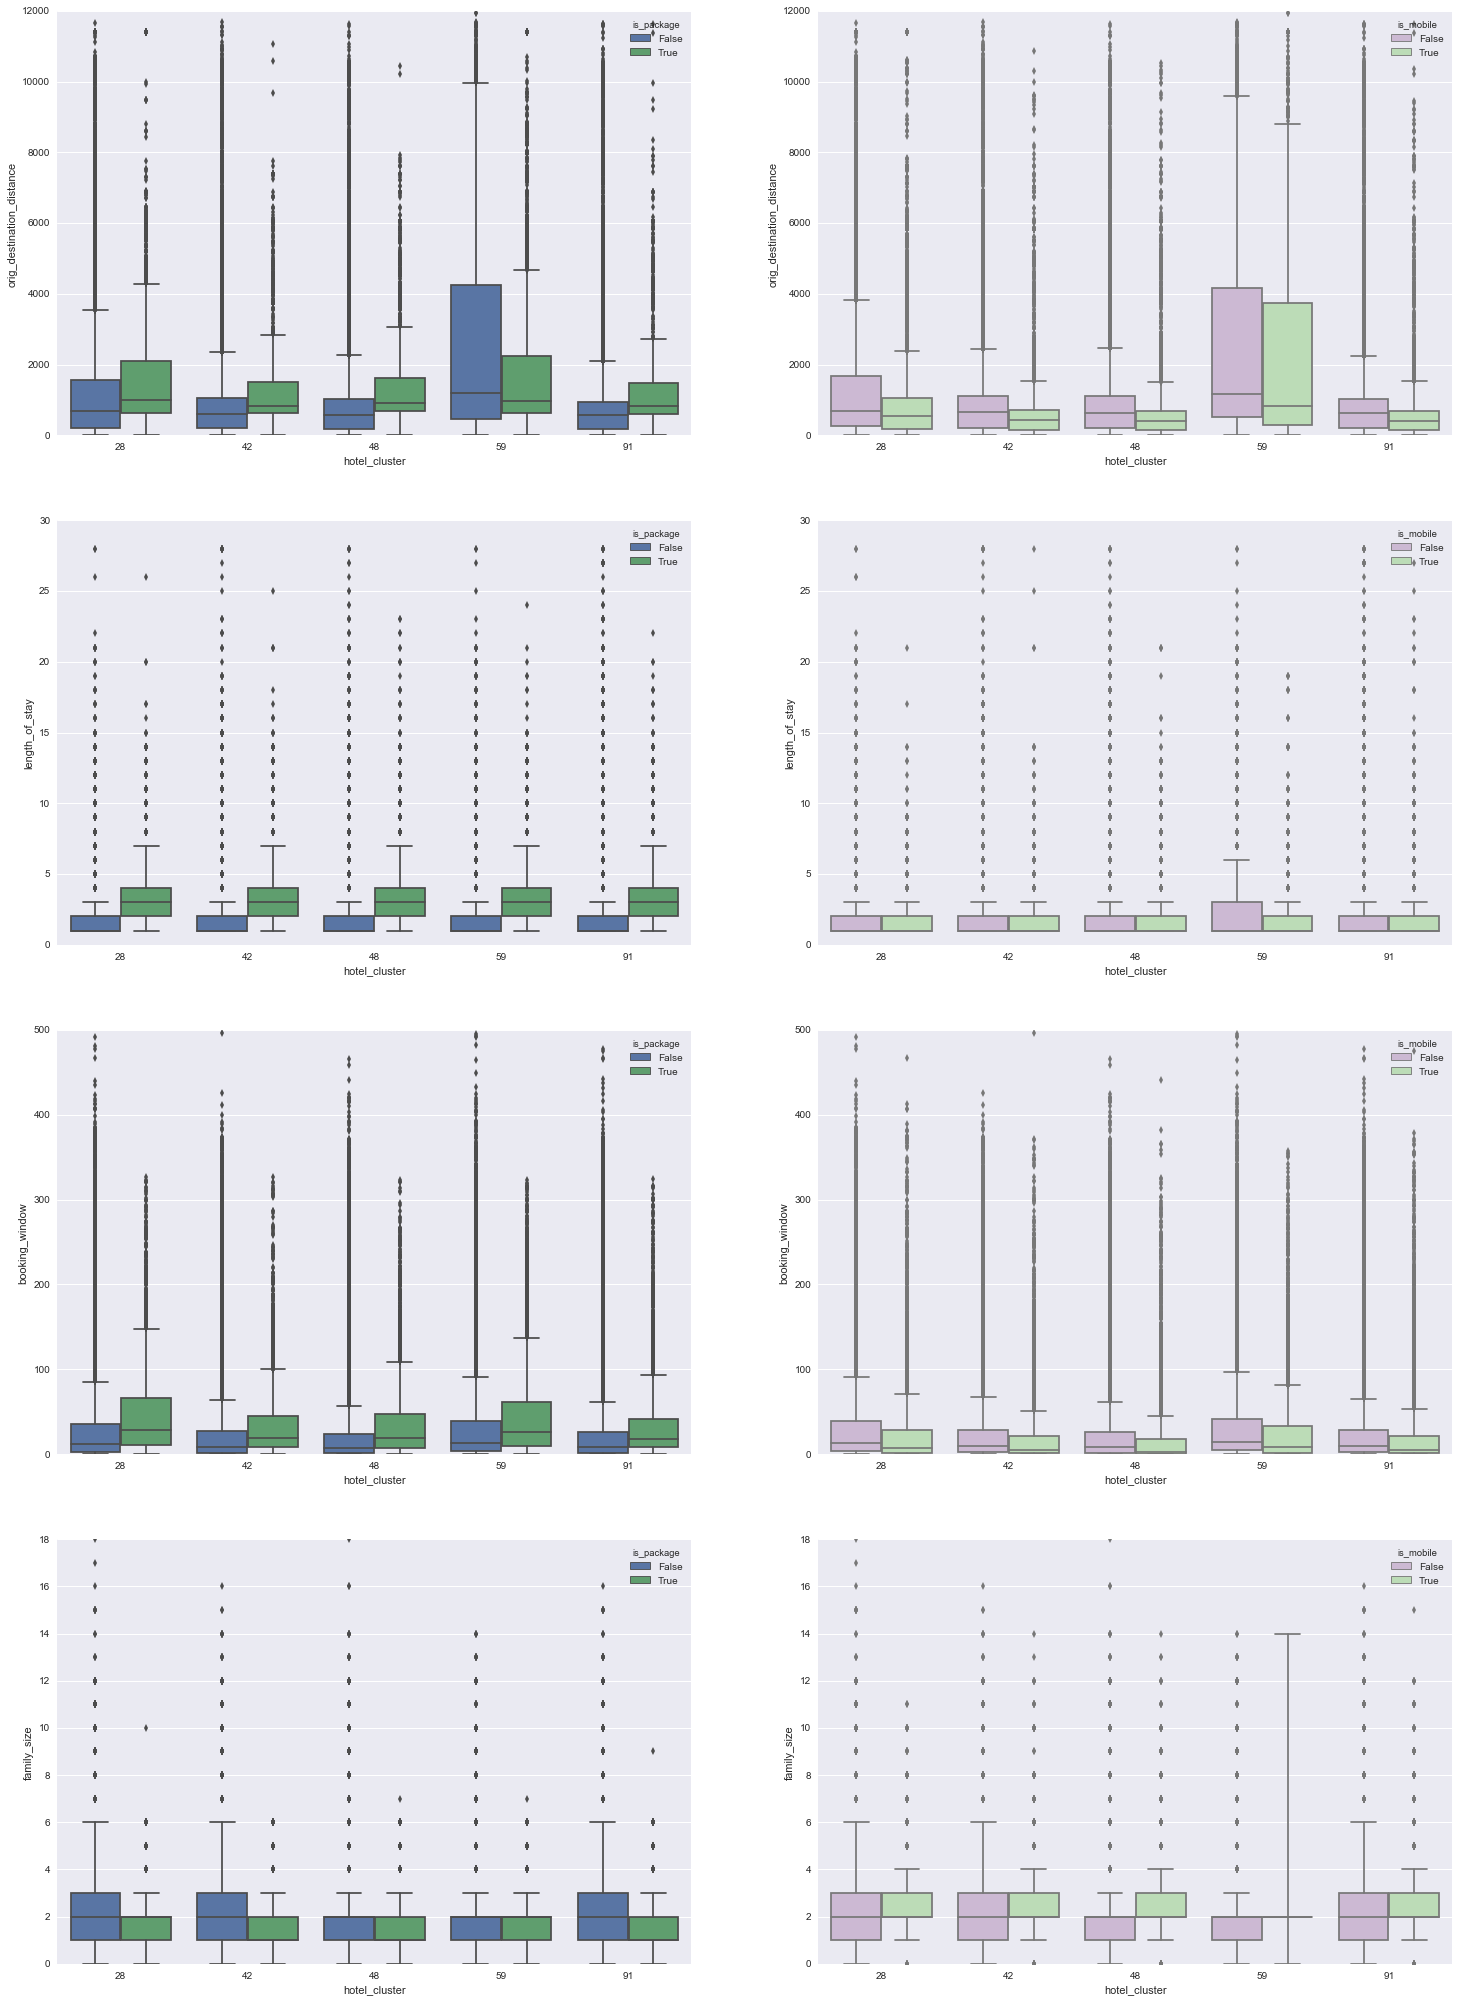

In [45]:
fig, ((axis1,axis2),(axis3,axis4),(axis5,axis6),(axis7,axis8)) = plt.subplots(4,2,figsize=(25,35))
sns.boxplot(x='hotel_cluster', y='orig_destination_distance', hue='is_package', data=train_booked_df, ax=axis1)
sns.boxplot(x='hotel_cluster', y='orig_destination_distance', hue='is_mobile', data=train_booked_df, ax=axis2, palette='PRGn')
sns.boxplot(x='hotel_cluster', y='length_of_stay', hue='is_package', data=train_booked_df, ax=axis3)
sns.boxplot(x='hotel_cluster', y='length_of_stay', hue='is_mobile', data=train_booked_df, ax=axis4, palette='PRGn')
sns.boxplot(x='hotel_cluster', y='booking_window', hue='is_package', data=train_booked_df, ax=axis5)
sns.boxplot(x='hotel_cluster', y='booking_window', hue='is_mobile', data=train_booked_df, ax=axis6, palette='PRGn')
sns.boxplot(x='hotel_cluster', y='family_size', hue='is_package', data=train_booked_df, ax=axis7)
sns.boxplot(x='hotel_cluster', y='family_size', hue='is_mobile', data=train_booked_df, ax=axis8, palette='PRGn')

### Summary statistics by class insights (Cont'd):
When we look at whether clusters are booked as part of a package, or whether they are booked on mobiles devices or not, we hope to gain further insights into cluster characteristics.

#### Packaged bookings:
Looking at package and distance once again clusters 28 and 59 stand out. But for 59 the user's distance is larger for those NOT booking a package than those who are. This is the opposite trend of all other clusters. Does this point to an international destination where packages are less likely to include airfare? Or does the destination country drive on the left where users might be less inclined to rent a car? These are some possibilities we've entertained.

Length of stay is uniformly longer for those booking packages which makes sense. Those who package trips to include airfare or rental car are probably staying more than one night rather than short term guests who are more likely to drive themselves or use local transporation upon arrival.

Booking window follows the same trend which can follow the same logic outlined in length of stay.

Family size tends to have a wider distribution for non-package bookings in clusters 28, 42, and 91. All packaged bookings are in line with the overall means, but these numbers might be due to smaller sample size of packaged bookings.

#### Mobile bookings
We already know that mobile only make up 10% of the overall bookings. We had hoped to see a standout cluster that might indicate a destination or hotel type more frequently chosen by younger demographics, but nothing in particular stands out from these plots.

### More Data Visualizations:
We've explored the summary statistics of the continuous variables as a whole and parsed out by classes. Now we want to explore any other relationships that might exist between the other categorical features and how they relate to the classes.

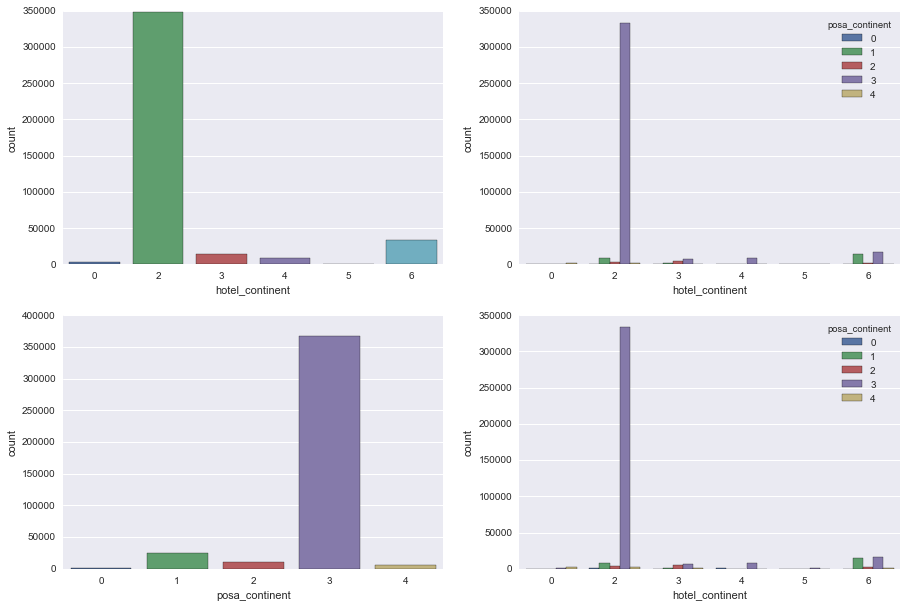

In [79]:
# preferred continent destinations and search origination:

fig, ((axis1,axis2),(axis3,axis4)) = plt.subplots(2,2,figsize=(15,10))

sns.countplot(x='hotel_continent', data=train_booked_df, ax=axis1)
sns.countplot(x='hotel_continent', hue='posa_continent', data=train_booked_df, ax=axis2)
sns.countplot(x='posa_continent', data=train_booked_df, ax=axis3)
sns.countplot(x='hotel_continent', hue='posa_continent', data=train_booked_df, ax=axis4)


### Continent booking trends:
At a high level we know that a primary component of the hotel cluster is the location, so this first group of histograms show us that most users are booking hotels in continent 2. Regions and markets tell us less since they are not clearly defined by Expedia. The best way to judge customer behavior is to look at user location through continent, country and city, and user destination through hotel continent and country. Combining these variables into one plot shows clearly that 85% of the users in our sample are searching for hotels in continent 2 from continent 3:

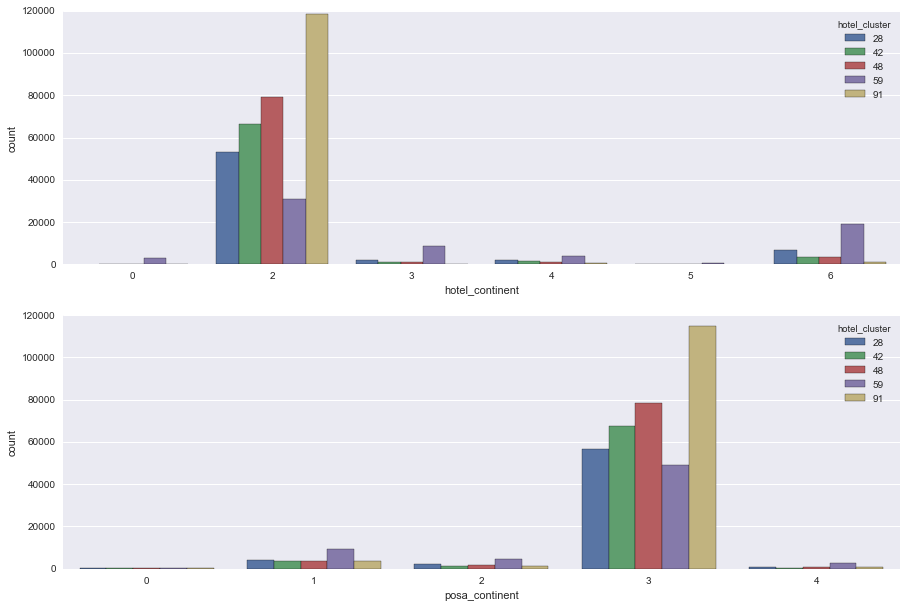

In [78]:
# preferred continent destinations and search origination:

fig, ((axis1,axis2)) = plt.subplots(2,1,figsize=(15,10))

sns.countplot(x='hotel_continent', hue='hotel_cluster', data=train_booked_df, ax=axis1)
sns.countplot(x='posa_continent', hue='hotel_cluster', data=train_booked_df, ax=axis2)

### Continent trends by classes
We know that location is a key component of what makes up our hotel clusters, so we would expect some degree of continuity between the hotel continents and the clusters assigned to each booking. For the most part this is what we see, but there is some leakage between continents in each cluster, primarily in clusters 28 and 59. We already know that these clusters have larger distances between user and hotel location, and cluster 59 in particular shows up in several different hotel and user continents. Perhaps the location component of this cluster is "airport hotel" which would target customers that are specifically traveling by plane. This might spread cluster 59 to several different airport hotels around the world as potential options for the user, and raise the mean distance in the process which is consistent with our observations.

### Searching for correlations between attributes:

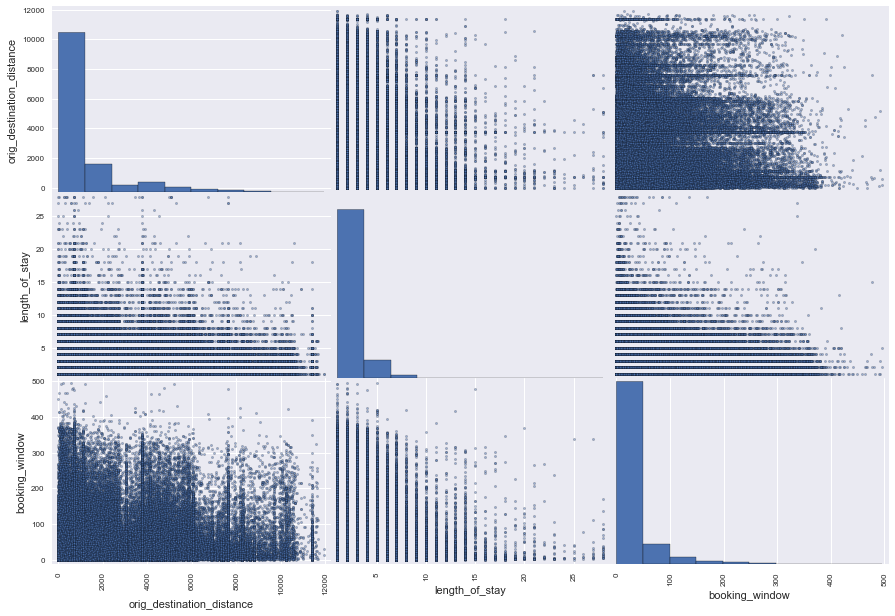

In [83]:
from pandas.tools.plotting import scatter_matrix
trainSub = train_booked_df[['posa_continent', 'user_location_country','user_location_region',
                            'user_location_city','orig_destination_distance','hotel_continent','hotel_country',
                           'hotel_market','hotel_cluster', 'length_of_stay', 'booking_window']]
ax = scatter_matrix(trainSub, figsize=(15,10))

### No correlation in continuous variables
The purpose of this plot is to confirm that no correlations exist between continuous variables. We already know going into the analysis that continuous variables are in shorter supply which is why we decided to derive more using the dates provided. So ensuring that they each lend explanatory power in their own right confirms the importance of each of them.

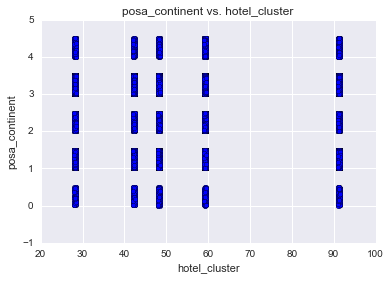

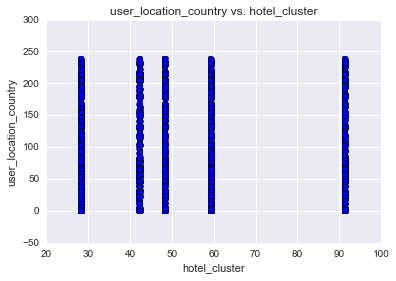

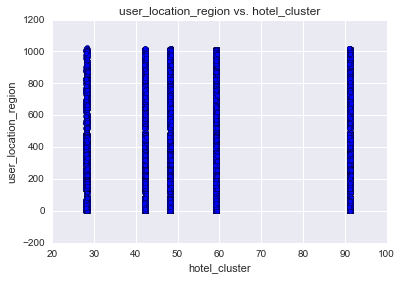

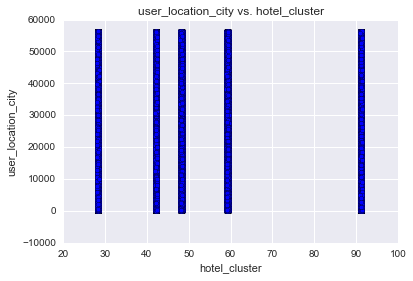

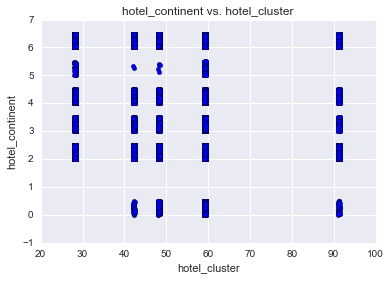

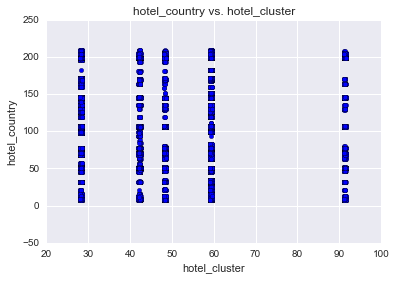

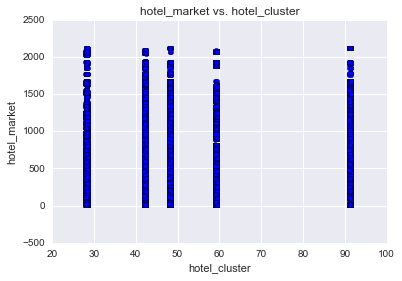

In [85]:
# Jittered plots to further seeks out correlations between attributes
non_continous = ('posa_continent', 'user_location_country','user_location_region',
                'user_location_city','hotel_continent','hotel_country','hotel_market')
for lablel in non_continous:
    s2 = plt.scatter(trainSub['hotel_cluster'] + 0.5*np.random.random(len(trainSub.index)), 
                 trainSub[lablel] + 0.5*np.random.random(len(trainSub.index)))
    plt.title(lablel + ' vs. hotel_cluster')
    plt.xlabel('hotel_cluster')
    plt.ylabel(lablel)
    plt.show()

### No correlations between geographic attributes and classes:
These scatter plots show that each hotel_cluster exists in all markets, countries and regions with fairly even distribution within each attribute. This further confirms that we can't determine correlations between certain user locations or user destinations based on jittered scatter plots.

### Length of stay and booking window relationship:

In [49]:
train_booked_df.groupby(['length_of_stay'])['booking_window'].agg(['mean','median','count','min','max'])

,mean,median,count,min,max
length_of_stay,,,,,
1,21.646799,7.0,227879,0,492
2,28.981843,12.0,89773,0,496
3,36.158714,18.0,45037,0,493
4,41.316097,21.0,22762,0,475
5,43.518806,23.0,10688,0,495
6,49.667004,27.0,4943,0,393
7,57.727562,34.0,3777,0,360
8,52.759259,29.5,1458,0,420
9,53.421412,29.0,878,0,334


The cross tab table shows that as the length of stay increases the amount of time in the booking window increases.  There are a few anomalies like 24 (days length of stay) but it's due to the low number of samples (6).  Some people will even book their hotels more than a year in advance though the mean is 24-33 days.  

### Seasonality analysis:

(0, 52)

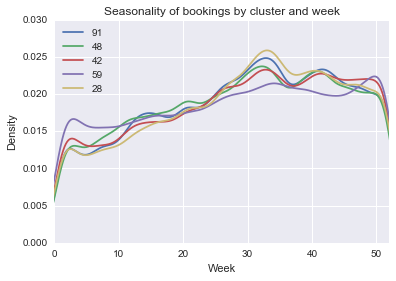

In [52]:
# plots a kernel density estimate of the subset of the 1st class passangers's age
train_booked_df.ci_week[train_booked_df.hotel_cluster == 91].plot(kind='kde')    
train_booked_df.ci_week[train_booked_df.hotel_cluster == 48].plot(kind='kde')
train_booked_df.ci_week[train_booked_df.hotel_cluster == 42].plot(kind='kde')
train_booked_df.ci_week[train_booked_df.hotel_cluster == 59].plot(kind='kde')
train_booked_df.ci_week[train_booked_df.hotel_cluster == 28].plot(kind='kde')
 # plots an axis lable
plt.xlabel("Week")    
plt.title("Seasonality of bookings by cluster and week")
# sets our legend for our graph.
plt.legend(('91', '48','42','59','28'),loc='best') 
plt.xlim(0,52)

### Seasonality by cluster:
The line plot above shows there is a seasonality difference to when each of the top 5 hotel clusters are booked.  Weeks 30- 40 look like the peak booking time.  The beginning of the year starts out slow but increases each week until it gets to week 34.  Cluster 59 acts a bit different then all the other clusters so it maybe used in the decision tree as we analyze the data more. This is consistent with all of the other previously mentioned indicators that show that cluster 59 marches to it's own beat. 

Our goal in adding seasonality through the week attribute will help us to predict the likelihood a cluster will be booked based off of historical behavior.  One cluster might be located near the beach so it has a high season in the summer months. If we were to combine this with continent we can see if there are certain seasons that are booked more.


(0, 52)

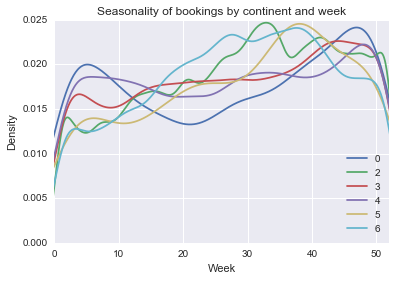

In [53]:
# plots a kernel density estimate of the subset of the 1st class passangers's age
train_booked_df.ci_week[train_booked_df.hotel_continent == 0].plot(kind='kde')    
train_booked_df.ci_week[train_booked_df.hotel_continent == 2].plot(kind='kde')
train_booked_df.ci_week[train_booked_df.hotel_continent == 3].plot(kind='kde')
train_booked_df.ci_week[train_booked_df.hotel_continent == 4].plot(kind='kde')
train_booked_df.ci_week[train_booked_df.hotel_continent == 5].plot(kind='kde')
train_booked_df.ci_week[train_booked_df.hotel_continent == 6].plot(kind='kde')
 # plots an axis lable
plt.xlabel("Week")    
plt.title("Seasonality of bookings by continent and week")
# sets our legend for our graph.
plt.legend(('0', '2','3','4','5','6'),loc='best') 
plt.xlim(0,52)

### Continental differences in seasonality:
Continent 0 stands out as having a distinctly different booked trend in terms of seasonality. It peaks faster after the holiday season then dips through the summer before peaking again before the holidays. Continents 3 and 4 have similar trends but are less pronounced. The others start with slower early year bookings then grow through the summer peaking between weeks 30 and 40, the prime summer travel months of July/August in the Northern Hemisphere. We would wager that these swings in booking trends are tied to the hemispheric differences between continental seasons. Our hope is that these differences will provide classification criteria for the hotel clusters.

### Marketing channel attribute:

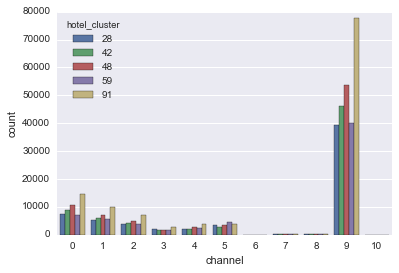

In [89]:
# Marketing channel histogram:
sns.countplot(x='channel', hue='hotel_cluster', data=train_booked_df)

It is clear that marketing channel 9 dominates all samples with the clusters represented roughly in porportion to their frequency in the overall data. For example, cluster 91 has the most instances in the data and shows up the most in all marketing channels with the exception of channel 5. This appears to be the only possible rule breaker that might lend itself to classification, but in general this attribute doesn't tell us a whole lot.

### Traveling with children

In [92]:
# Adults only bookings (top 5)
adults = train_booked_df[train_booked_df['srch_children_cnt']==0]
clusterAdult = set(adults['hotel_cluster'])

# Children only bookings (top 5)
children = train_booked_df[train_booked_df['srch_children_cnt']>0]
clusterChild = set(children['hotel_cluster'])

hclusterChild = children.groupby(by=[children['hotel_cluster']])
hclusterChildCount = hclusterChild.hotel_cluster.count()
hclusterAdult = adults.groupby(by=[adults['hotel_cluster']])
hclusterAdultCount = hclusterAdult.hotel_cluster.count()

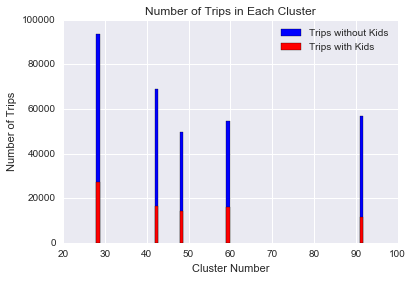

In [96]:
p1 = plt.bar(clusterAdult,hclusterAdultCount, color = 'b')
p2 = plt.bar(clusterChild,hclusterChildCount, color = 'r')
plt.title('Number of Trips in Each Cluster') 
plt.ylabel('Number of Trips')
plt.xlabel('Cluster Number')
plt.legend((p1[0], p2[0]), ('Trips without Kids', 'Trips with Kids'))
plt.show()



In [104]:
# Percentage of trips with kids
hclusterChildCount / (hclusterChildCount + hclusterAdultCount)

hotel_cluster
28    0.225853
42    0.221226
48    0.190709
59    0.174887
91    0.226451
Name: hotel_cluster, dtype: float64

From this chart we can see that people travel without kids more to all the top 5 hotel clusters. Also, the trips with and without kids between clusters seems to be about the between hotel clusters (17-22%). We already know that clusters 48 and 59 have a lower family sizes and that overall trips with kids are booked less, and the percentages displayed here support the conclusions we've already made.

## Lab 1 Conclusions

### Data preprocessing and interpretation
We've successfully navigated a huge data set to arrive at a reduced subset to visualize and start understanding the underlying trends in the variables. We've successfully assessed missing data fields and imputed them with averaged values from similarly grouped variables. We've uncovered relationships between hotel clusters and all the continuous variables which yielded particularly interesting insights surrounding cluster 59, 28, and 48. We uncovered a relationship between users located in continent 3 booking commonly into hotels in continent 2. Seasonality is also a component that who hope will help classification efforts of clusters. It's also been clear so far that even among the small number of hotel clusters on which we've focused, it seems like obvious correlations between other data fields are not immediately evident. 